
--- pdr.DataReader("NIKKEI225", 'fred', dates[0], dates[-1]) ---
DATE
1949-05-16    176.21
1949-05-17    174.80
1949-05-18    172.53
1949-05-19    171.34
1949-05-20    169.20
Name: NIKKEI225, dtype: float64


RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv?ignore=.csv&a=8&s=%5EN225&d=4&c=1986&b=3&e=10&f=2017&g=d

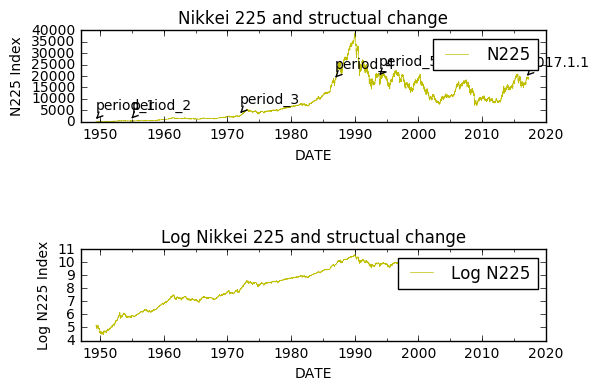

In [1]:
# http://www.geocities.jp/sundayvoyager/trade_cycle.html
# period_1 : 戦後復興期 (19495/16 ～ 1954/11/30)
# period_2 : 高度経済成長期 (19454/12/1 ～ 1971/12/31
# period_3 : 安定成長期 (1972/1/1 ～ 1986/11/30)
# period_4 : バブル経済期 (1986/12/1～1993/10/31)
# period_5 : 経済変革期 (1993/11/1 ～ now)

# 循環期名をリストに
states=['period_1','period_2','period_3','period_4','period_5','Today']
# 期の始点をリストに
dates=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1993/11/1","2017/4/10"]
# 循環期とその始点の配列を、タプルを使って作成
struct_break=[('1949/5/16','period_1'),('1954/12/1','period_2'),('1972/1/1','period_3'),('1986/12/1','period_4'),('1993/11/1','period_5'),('2017/1/1','2017.1.1')]

#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr

#  N225取得
print ('\n--- pdr.DataReader("NIKKEI225", \'fred\', dates[0], dates[-1]) ---')
n225 = pdr.DataReader("NIKKEI225", 'fred', dates[0], dates[-1]).NIKKEI225
print(n225.head(5))

%matplotlib inline
import matplotlib.pyplot as plt

# プロットに必要なウィンドウを取得
fig = plt.figure()

#-----------------------------------------
# サブプロットを追加 （2x1、1番）
ax1=fig.add_subplot(3,1,1)

# チャートを描画
n225.plot(ax=ax1, style='y-',linewidth=0.5, label='N225')
ax1.legend()

# 現在アクィブナサブプロットに対して、タイトルを設定
plt.ylabel('N225 Index')
plt.title("Nikkei 225 and structual change")
# サプブロットを指定して、タイトルを設定（上記と同じ結果が得られる）
#g.set_ylabel('N225 Index')
#g.set_title("Nikkei 225 and structual change")

# X軸の範囲を指定
ax1.set_xlim(['1947/1/1','2020/1/1'])

# 循環期とその始点のタプルの配列でｘ軸を区切る
for date, label in struct_break:
    ax1.annotate(label,
        xy=(date, n225.asof(date)+1000),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, n225.asof(date)+10000),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )


#-----------------------------------------
import numpy as np

# サブプロットを追加 （2x1、2番）
ax2=fig.add_subplot(3,1,3)

# nympyのlogを使って対数を取得
ln_n225=np.log(n225)

# チャートを描画
ln_n225.plot(ax=ax2, style='y-',linewidth=0.5, label='Log N225')
ax2.legend()

# 現在アクィブナサブプロットに対して、タイトルを設定
plt.ylabel('Log N225 Index')
plt.title("Log Nikkei 225 and structual change")

# X軸の範囲を指定
ax2.set_xlim(['1947/1/1','2020/1/1'])

# 循環期とその始点のタプルの配列でｘ軸を区切る （結果がおかしくなるのでコメントアウト）
#for date, label in struct_break:
#    ax2.annotate(label,
#        xy=(date, n225.asof(date)),    # annotateを指定する座標 asof(date)で指定日のデータを取得
#        xytext=(date, n225.asof(date)-0.5),    # annotateの文字の表示座標
#        horizontalalignment='left', 
#        verticalalignment='top',
#        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
#    )

end = "2017/5/10"
plt.figure(figsize=(8,4))
analysis= pdr.DataReader("^N225", 'yahoo',"1986/9/3",end)
analysis['intraday']=0#None
analysis['overnight']=0#None
c0=analysis.Close.iloc[0]
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]#列0
    c=analysis.iloc[i,3]#列3
    analysis.iloc[i,6]=c-o#列6　Intraday
    analysis.iloc[i,7]=o-c0#列７ overnight
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle='--',linewidth=1)
plt.legend()
plt.ylabel('PL or N225 Index')
plt.legend(loc='lower left')
